## setup and resources

### imports

In [1]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from rna_secstruct_design.selection import get_selection, SecStruct

from q_dms_ttr_paper.paths import DATA_PATH, LIB_PATH
from q_dms_ttr_paper.plotting import (
    plot_pop_avg_from_row, find_stretches, fill_between, plot_pop_avg)



# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 20
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

### load data

In [16]:
df_wt_mg = pd.read_json(f"{DATA_PATH}/processed/wt_mg_titra.json")
df_wt_buff = pd.read_json(f"{DATA_PATH}/processed/wt_buffer_titra.json")
df_mttr6_muts = pd.read_json(f"{DATA_PATH}/processed/mttr6_muts_titra.json")
df_mttr6_full = pd.read_json(f"{DATA_PATH}/processed/mttr6_data_full.json")
df_mg_1_2 = pd.read_csv(f"{DATA_PATH}/processed/mtt6_data_mg_1_2.csv")
df_dg = pd.read_csv(f"{LIB_PATH}/resources/csvs/ttr_mutation_dgs_subset.csv")
df_dg_new = pd.read_csv(f"{LIB_PATH}/resources/csvs/rna_map_dg.csv")

### plots

In [3]:
def plot_buffer_heatmap(df_sub):
    datas = []
    names = []
    for i, row1 in df_sub.iterrows():
        name = row1["buffer"] + "-" + str(row1["buffer_conc"])
        data = [name]
        names.append(name)
        for j, row2 in df_sub.iterrows():
            data.append(
                round(stats.pearsonr(row1["data"], row2["data"])[0] ** 2, 2)
            )
        datas.append(data)
    cols = ["name"]
    cols.extend(names)
    df_heat = pd.DataFrame(datas, columns=cols)
    fig, ax = plt.subplots(figsize=(10, 10), dpi=600)
    g = sns.heatmap(
        (df_heat.set_index("name")),
        annot=True,
        cmap="viridis",
        ax=ax,
        annot_kws={"fontsize": 10},
    )
    # ensure y labels are not rotated!
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

In [4]:
# style functions
def publication_style_ax(ax):
    for spine in ax.spines.values():
        spine.set_linewidth(2)
    ax.tick_params(width=2)
    fsize = 24
    ax.xaxis.label.set_fontsize(fsize)
    ax.yaxis.label.set_fontsize(fsize)
    ax.tick_params(axis='both', which='major', labelsize=fsize-2)


def publication_scatter(ax, x, y, **kwargs):
    ax.scatter(x, y, s=150, **kwargs)


def publication_line(ax, x, y, **kwargs):
    ax.plot(x, y, markersize=10, lw=2, **kwargs)

## actual plots

### OLD: Supplemental Figure 5: Comparison of buffer conditions for DMS-MaPseq

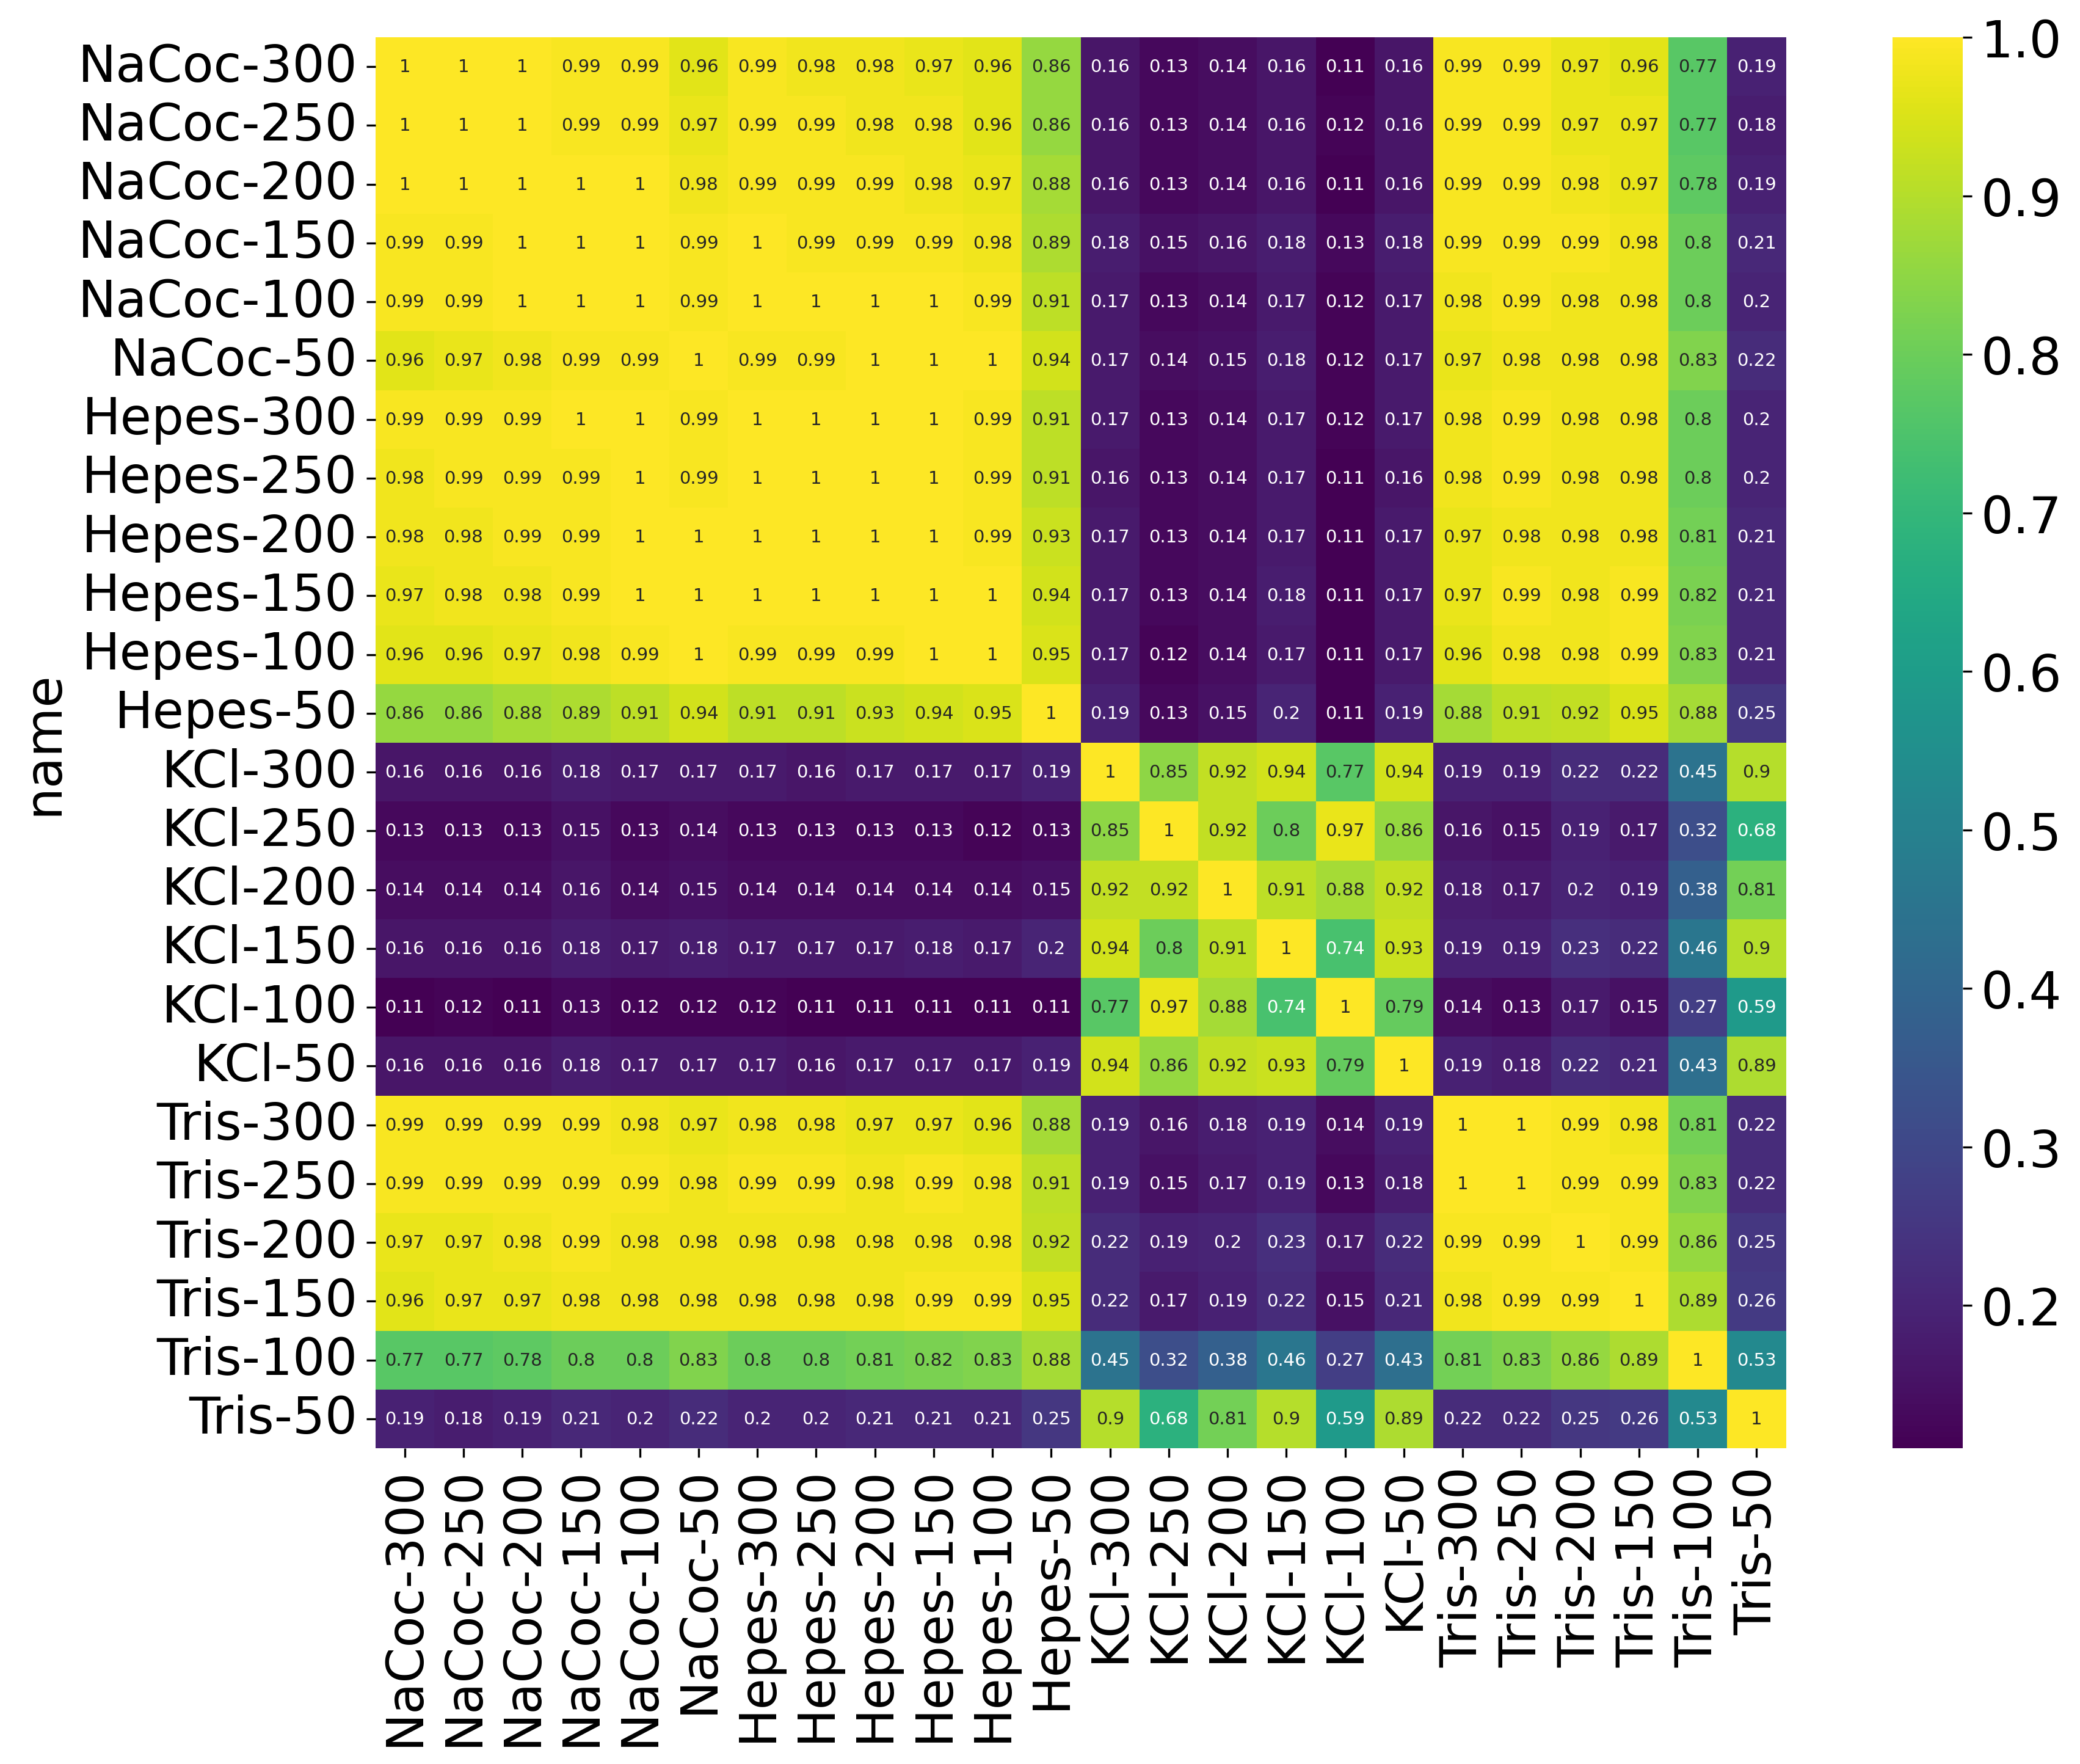

In [5]:
exp_names = [
    "2022_07_25_C0117_NaC_Hep_titra_CM_BL",
    "2022_07_26_C0117_KCl_Tris_titra_CM_BL",
]
dfs = []
for exp in exp_names:
    df_sub = df_wt_buff[df_wt_buff.exp_name == exp]
    dfs.append(df_sub)
df_sub = pd.concat(dfs)
datas = []
names = []
for i, row1 in df_sub.iterrows():
    name = row1['buffer'] + "-" + str(row1['buffer_conc'])
    data = [name]
    names.append(name)
    for j, row2 in df_sub.iterrows():
        data.append(round(stats.pearsonr(row1['data'], row2['data'])[0] ** 2, 2))
    datas.append(data)
cols = ['name']
cols.extend(names)
df_heat = pd.DataFrame(datas, columns=cols)
fig, ax = plt.subplots(dpi=300) 
g = sns.heatmap(
    (df_heat
     .set_index('name')), annot=True, cmap='viridis', ax=ax, annot_kws={"fontsize":7})
ax.set_aspect('equal')

### Supplemental Figure 6:  

In [6]:
df_wt_mg["df_type"] = "df_wt_mg"
df_wt_buff["df_type"] = "df_wt_buff"
df_mttr6_muts["df_type"] = "df_mttr6_muts"
df_all = pd.concat([df_wt_mg, df_wt_buff, df_mttr6_muts])
# print all unique combos between run_name and exp_name
df_all.groupby(['df_type', 'run_name', 'exp_name', 'name']).count()

sequence  \
df_type       run_name                                 exp_name                                       name                                      
df_mttr6_muts 2023_02_02_minittr_6_uucg_Mg_titra_seq   2023_01_30_C013S_50mM_NaC_Mg_titra_CM          minittr_6_uucg_fixed                 16   
              2023_02_17_no_3_3_junc_Mg_titr_seq       2023_02_09_C013V_50mM_NaC_Mg_titra_CM          minittr_6_no_3_3_junc_fixed          16   
              2023_03_10_h1_3bp_longer_seq             2023_03_06_C013W_50mM_NaC_Mg_titra_CM          minittr_6_h1_3bp_longer_fixed        16   
              2023_03_13_no_tlr_Mg_titra_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_tlr_fixed               16   
              2023_03_14_no_ires_Mg_titr_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_ires_fixed              16   
              2023_03_15_h2_3bp_longer_Mg_titra_seq    2023_03_14_C013X_50mM_NaC_Mg_titra_CM          minittr_6_h2_3bp_longer_fixed        16   
              2023_03_22_h3_3bp_longer_Mg_titra_seq    2023_03_07_C013Y_50mM_NaC_Mg_titra_CM          minittr_6_h3_3bp_longer_fixed        16   
df_wt_buff    2022_07_20_minittr_Hepes-titra_seq       2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL minittr-6-2HP-ref                     8   
              2022_07_26_minittr-6-2HP-ref_buffer_seq  2022_07_25_C0117_NaC_Hep_titra_CM_BL           minittr-6-2HP-ref                    12   
                                                       2022_07_26_C0117_KCl_Tris_titra_CM_BL          minittr-6-2HP-ref                    12   
df_wt_mg      2022_07_27_minittr_50mM_NaC_Mg_titra_seq 2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM        minittr-6-2HP-ref                    15   
              2022_07_28_minittr_0.1M_NaC_Mg_titra_seq 2022_07_28_C0117_100mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_07_29_minittr_0.15M_NaC_Mg_titr_seq 2022_07_29_C0117_150mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_09_minittr_0.2M_NaC_Mg_titra_seq 2022_08_08_C0117_200mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_10_minittr_0.25M_NaC_Mg_titr_seq 2022_08_09_C0117_250mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   
              2022_08_11_minittr_0.3M_NaC_Mg_titra_seq 2022_08_10_C0117_300mM_NaC_Mg_titra_CM         minittr-6-2HP-ref                    16   

                                                                                                                                     structure  \
df_type       run_name                                 exp_name                                       name                                       
df_mttr6_muts 2023_02_02_minittr_6_uucg_Mg_titra_seq   2023_01_30_C013S_50mM_NaC_Mg_titra_CM          minittr_6_uucg_fixed                  16   
              2023_02_17_no_3_3_junc_Mg_titr_seq       2023_02_09_C013V_50mM_NaC_Mg_titra_CM          minittr_6_no_3_3_junc_fixed           16   
              2023_03_10_h1_3bp_longer_seq             2023_03_06_C013W_50mM_NaC_Mg_titra_CM          minittr_6_h1_3bp_longer_fixed         16   
              2023_03_13_no_tlr_Mg_titra_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_tlr_fixed                16   
              2023_03_14_no_ires_Mg_titr_redo_seq      2023_03_13_C013U_50mM_NaC_Mg_titra_redone_CM   minittr_6_no_ires_fixed               16   
              2023_03_15_h2_3bp_longer_Mg_titra_seq    2023_03_14_C013X_50mM_NaC_Mg_titra_CM          minittr_6_h2_3bp_longer_fixed         16   
              2023_03_22_h3_3bp_longer_Mg_titra_seq    2023_03_07_C013Y_50mM_NaC_Mg_titra_CM          minittr_6_h3_3bp_longer_fixed         16   
df_wt_buff    2022_07_20_minittr_Hepes-titra_seq       2022_07_18_C0117_100mM_buffer_Mg2+_titra_CM_BL minittr-6-2HP-ref                      8   
              2022_07_26_minittr-6-2HP-ref_buffer_seq  2022_07

In [7]:
wt_w_o_mg = df_wt_mg[(df_wt_mg.mg_conc == 0) & (df_wt_mg.exp_name == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM")].iloc[0]
uucg_w_o_mg = df_mttr6_muts[(df_mttr6_muts.mg_conc == 0) & (df_mttr6_muts.name == "minittr_6_uucg_fixed")].iloc[0]
no_tlr_w_o_mg = df_mttr6_muts[(df_mttr6_muts.mg_conc == 0) & (df_mttr6_muts.name == "minittr_6_no_tlr_fixed")].iloc[0]


In [8]:
# how to do highlights
def get_highlight_bounds(sequence, structure, highlights):
    highlight_bounds = []
    secstruct = SecStruct(sequence, structure)
    for h in highlights:
        selection = get_selection(secstruct, h)
        for bounds in find_stretches(selection):
            highlight_bounds.append(bounds)
    return highlight_bounds

(-4.0, 94.0)

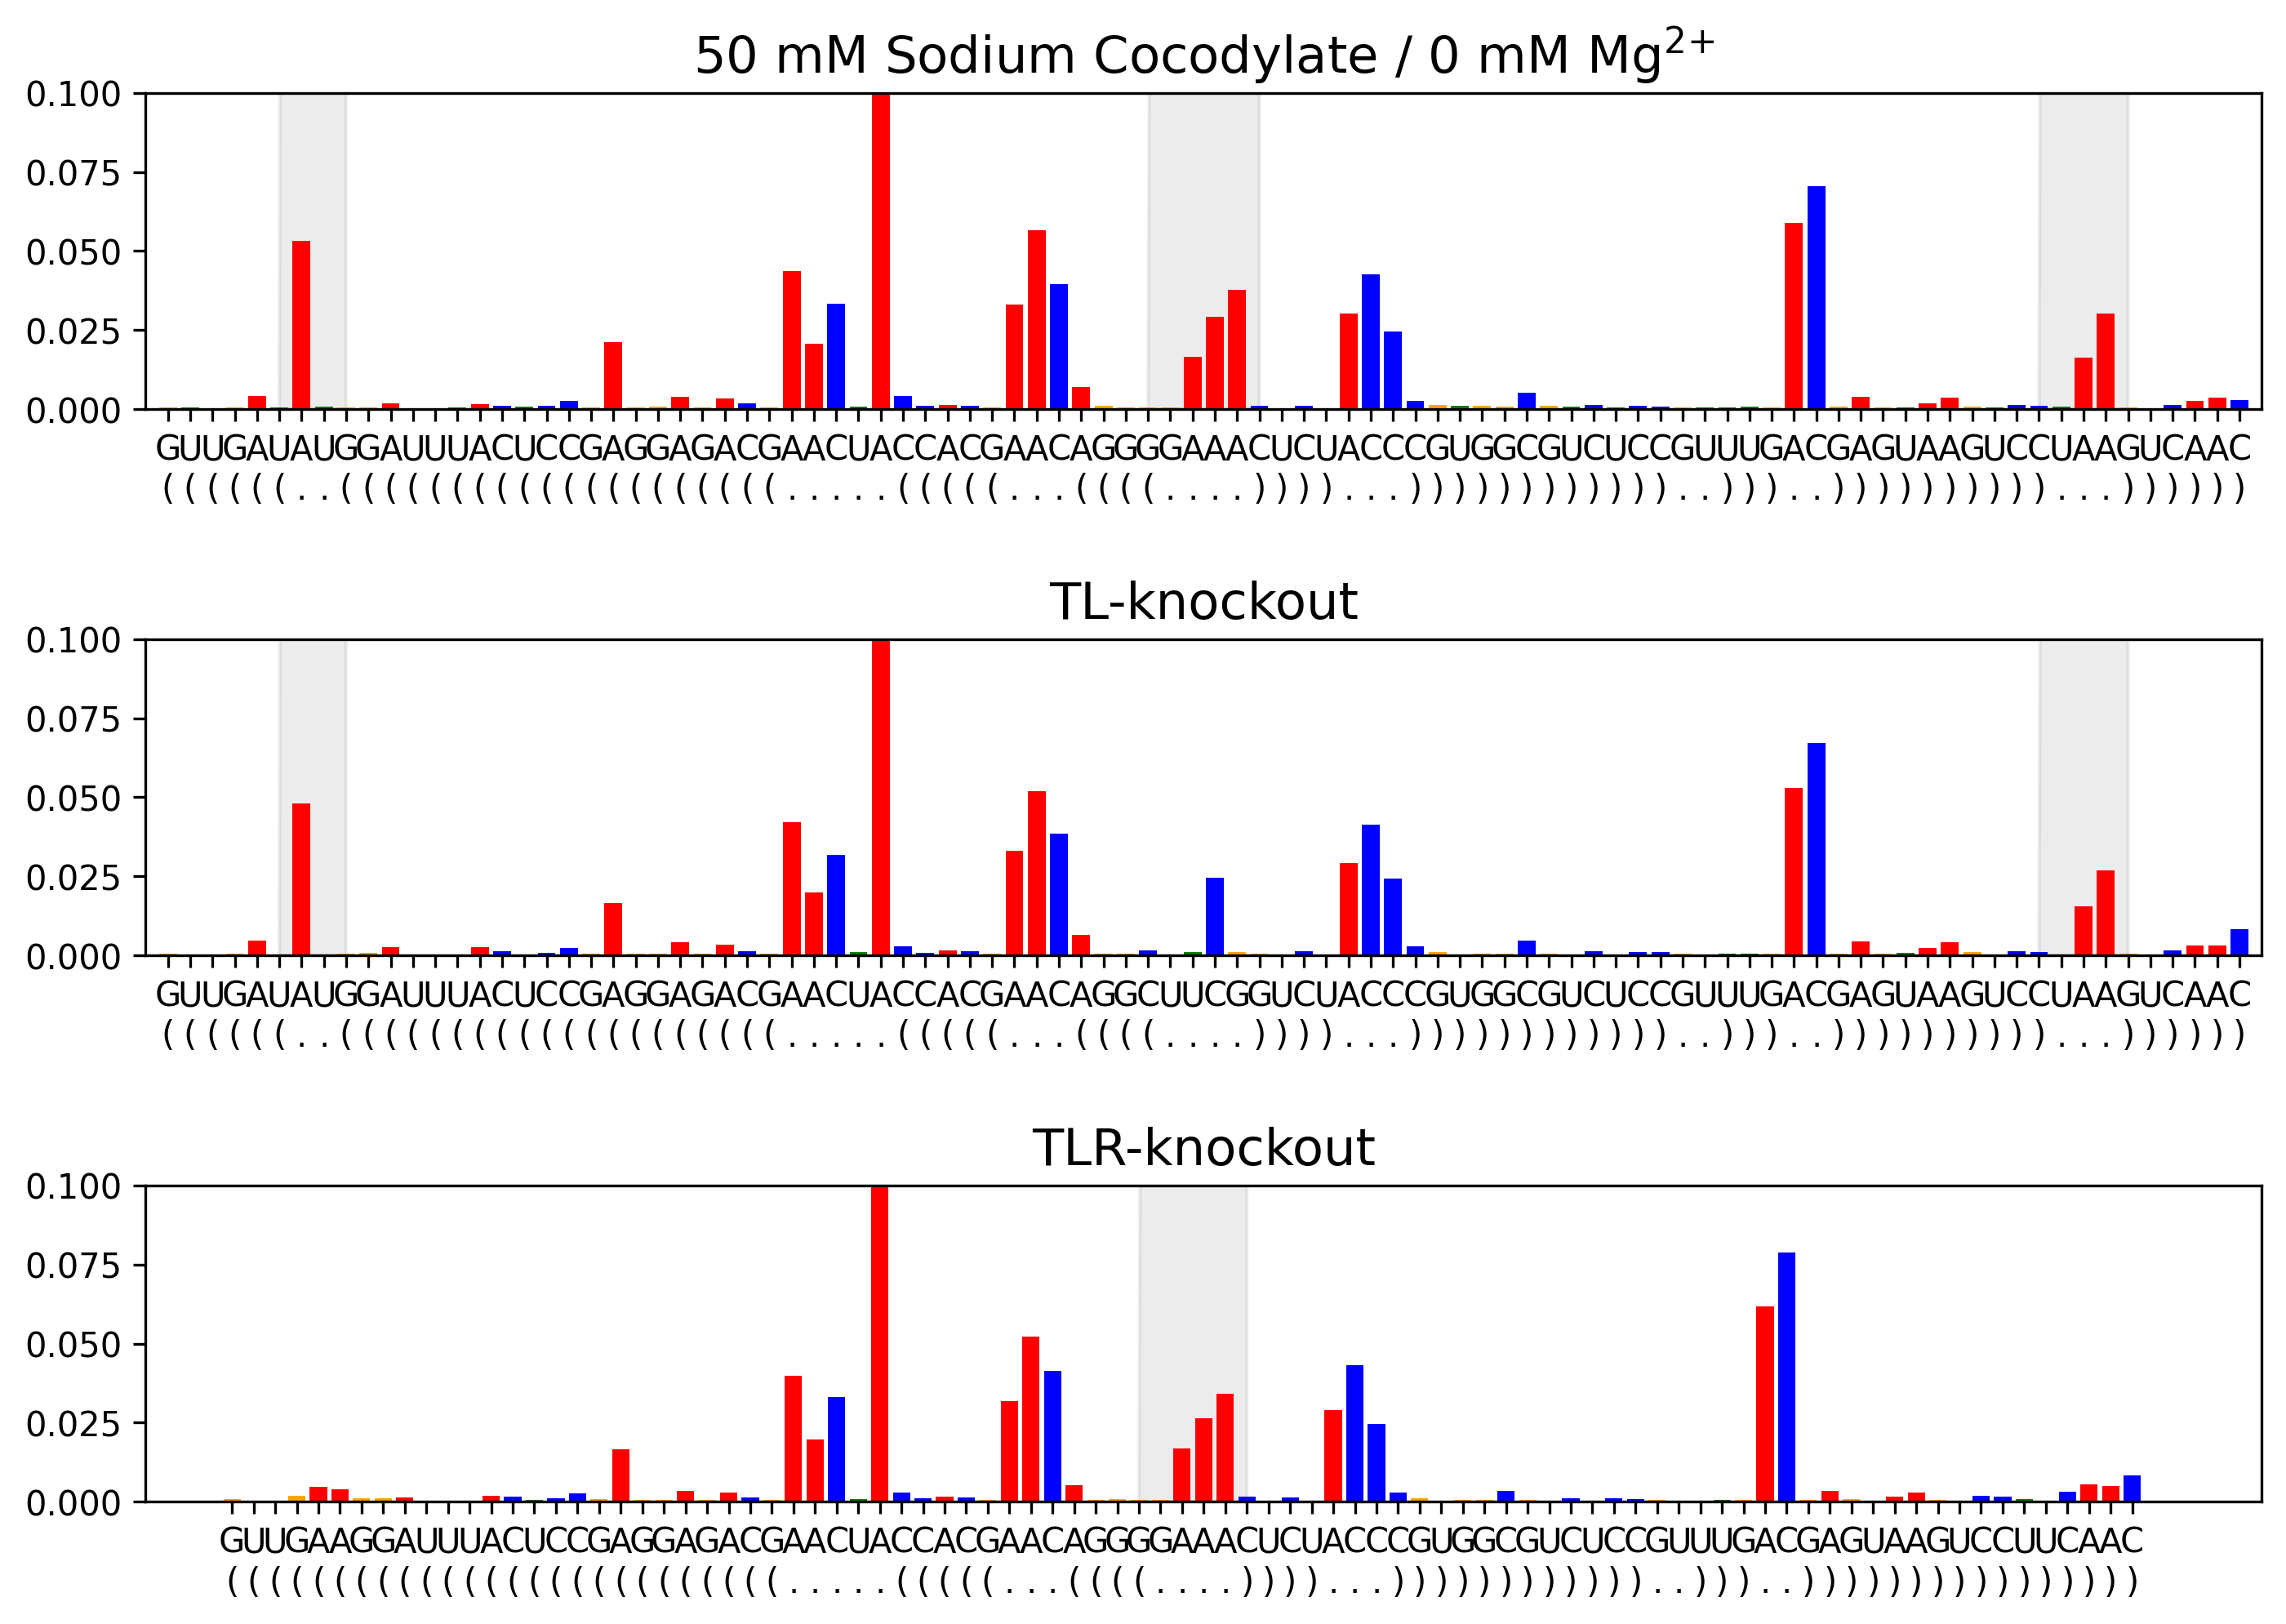

In [15]:
highlights = []
highlights.append({"motif": {"name": "gaaa_tetraloop"}})
highlights.append({"motif": {"name": "tlr"}})
fig, axes = plt.subplots(3, 1, figsize=(10, 7), dpi=300)
plot_pop_avg(wt_w_o_mg["sequence"], wt_w_o_mg["structure"], wt_w_o_mg["data"], ax=axes[0], 
             trim_5p=20, trim_3p=22, highlights=highlights)
axes[0].set_title("50 mM Sodium Cocodylate / 0 mM Mg$^{2\!+}\!$", fontsize=15)
axes[0].tick_params(axis='both', labelsize=10)  # Adjusts both x and y tick labels
axes[0].set_ylim([0, 0.1])
axes[0].set_xlim([-1, len(wt_w_o_mg["sequence"]) - 22 - 20])
plot_pop_avg(uucg_w_o_mg["sequence"], uucg_w_o_mg["structure"], uucg_w_o_mg["data"], 
             ax=axes[1], trim_5p=20, trim_3p=0, highlights=[highlights[1]])
axes[1].set_title("TL-knockout", fontsize=15)
axes[1].tick_params(axis='both', labelsize=10)  # Adjusts both x and y tick labels
axes[1].set_ylim([0, 0.1])
axes[1].set_xlim([-1, len(uucg_w_o_mg["sequence"]) - 20])
fig.tight_layout()
plot_pop_avg(no_tlr_w_o_mg["sequence"], no_tlr_w_o_mg["structure"], no_tlr_w_o_mg["data"], 
             ax=axes[2], trim_5p=20, trim_3p=0, highlights=[highlights[0]])
axes[2].set_title("TLR-knockout", fontsize=15)
axes[2].set_ylim([0, 0.1])
axes[2].tick_params(axis='both', labelsize=10)  # Adjusts both x and y tick labels
axes[2].set_ylim([0, 0.1])
axes[2].set_xlim([-4, len(uucg_w_o_mg["sequence"]) - 20])
#plt.savefig(f"supplemental_figure_6.pdf", bbox_inches='tight')


### Supplemental Figure 8

In [10]:
def get_motif_data(df_wt, df_uucg, motif_name, motif_seq, motif_ss):
    data = []
    for i, row in df_wt.iterrows():
        count = 1
        uucg_row = df_uucg[df_uucg["mg_conc"] == row["mg_conc"]].iloc[0]
        for seq, ss, wt_val, uucg_val in zip(
            motif_seq, motif_ss, row[motif_name], uucg_row[motif_name]
        ):
            if seq != "A" and seq != "C":
                continue
            data.append(
                {
                    "name": str(count) + seq,
                    "seq": seq,
                    "ss": ss,
                    "wt_val": wt_val,
                    "wt_norm": wt_val / row["ref_hp_1_as"],
                    "uucg_val": uucg_val,
                    "uucg_norm": uucg_val / uucg_row["ref_hp_1_as"],
                    "mg_conc": row["mg_conc"],
                }
            )
            count += 1
    df = pd.DataFrame(data)
    return df

In [11]:
df_wt = df_wt_mg[df_wt_mg["exp_name"] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"]
df_uucg = df_mttr6_muts[df_mttr6_muts["name"] == "minittr_6_uucg_fixed"]
df_uucg = df_uucg.sort_values("mg_conc")


AttributeError: 'Figure' object has no attribute 'set_fontsize'

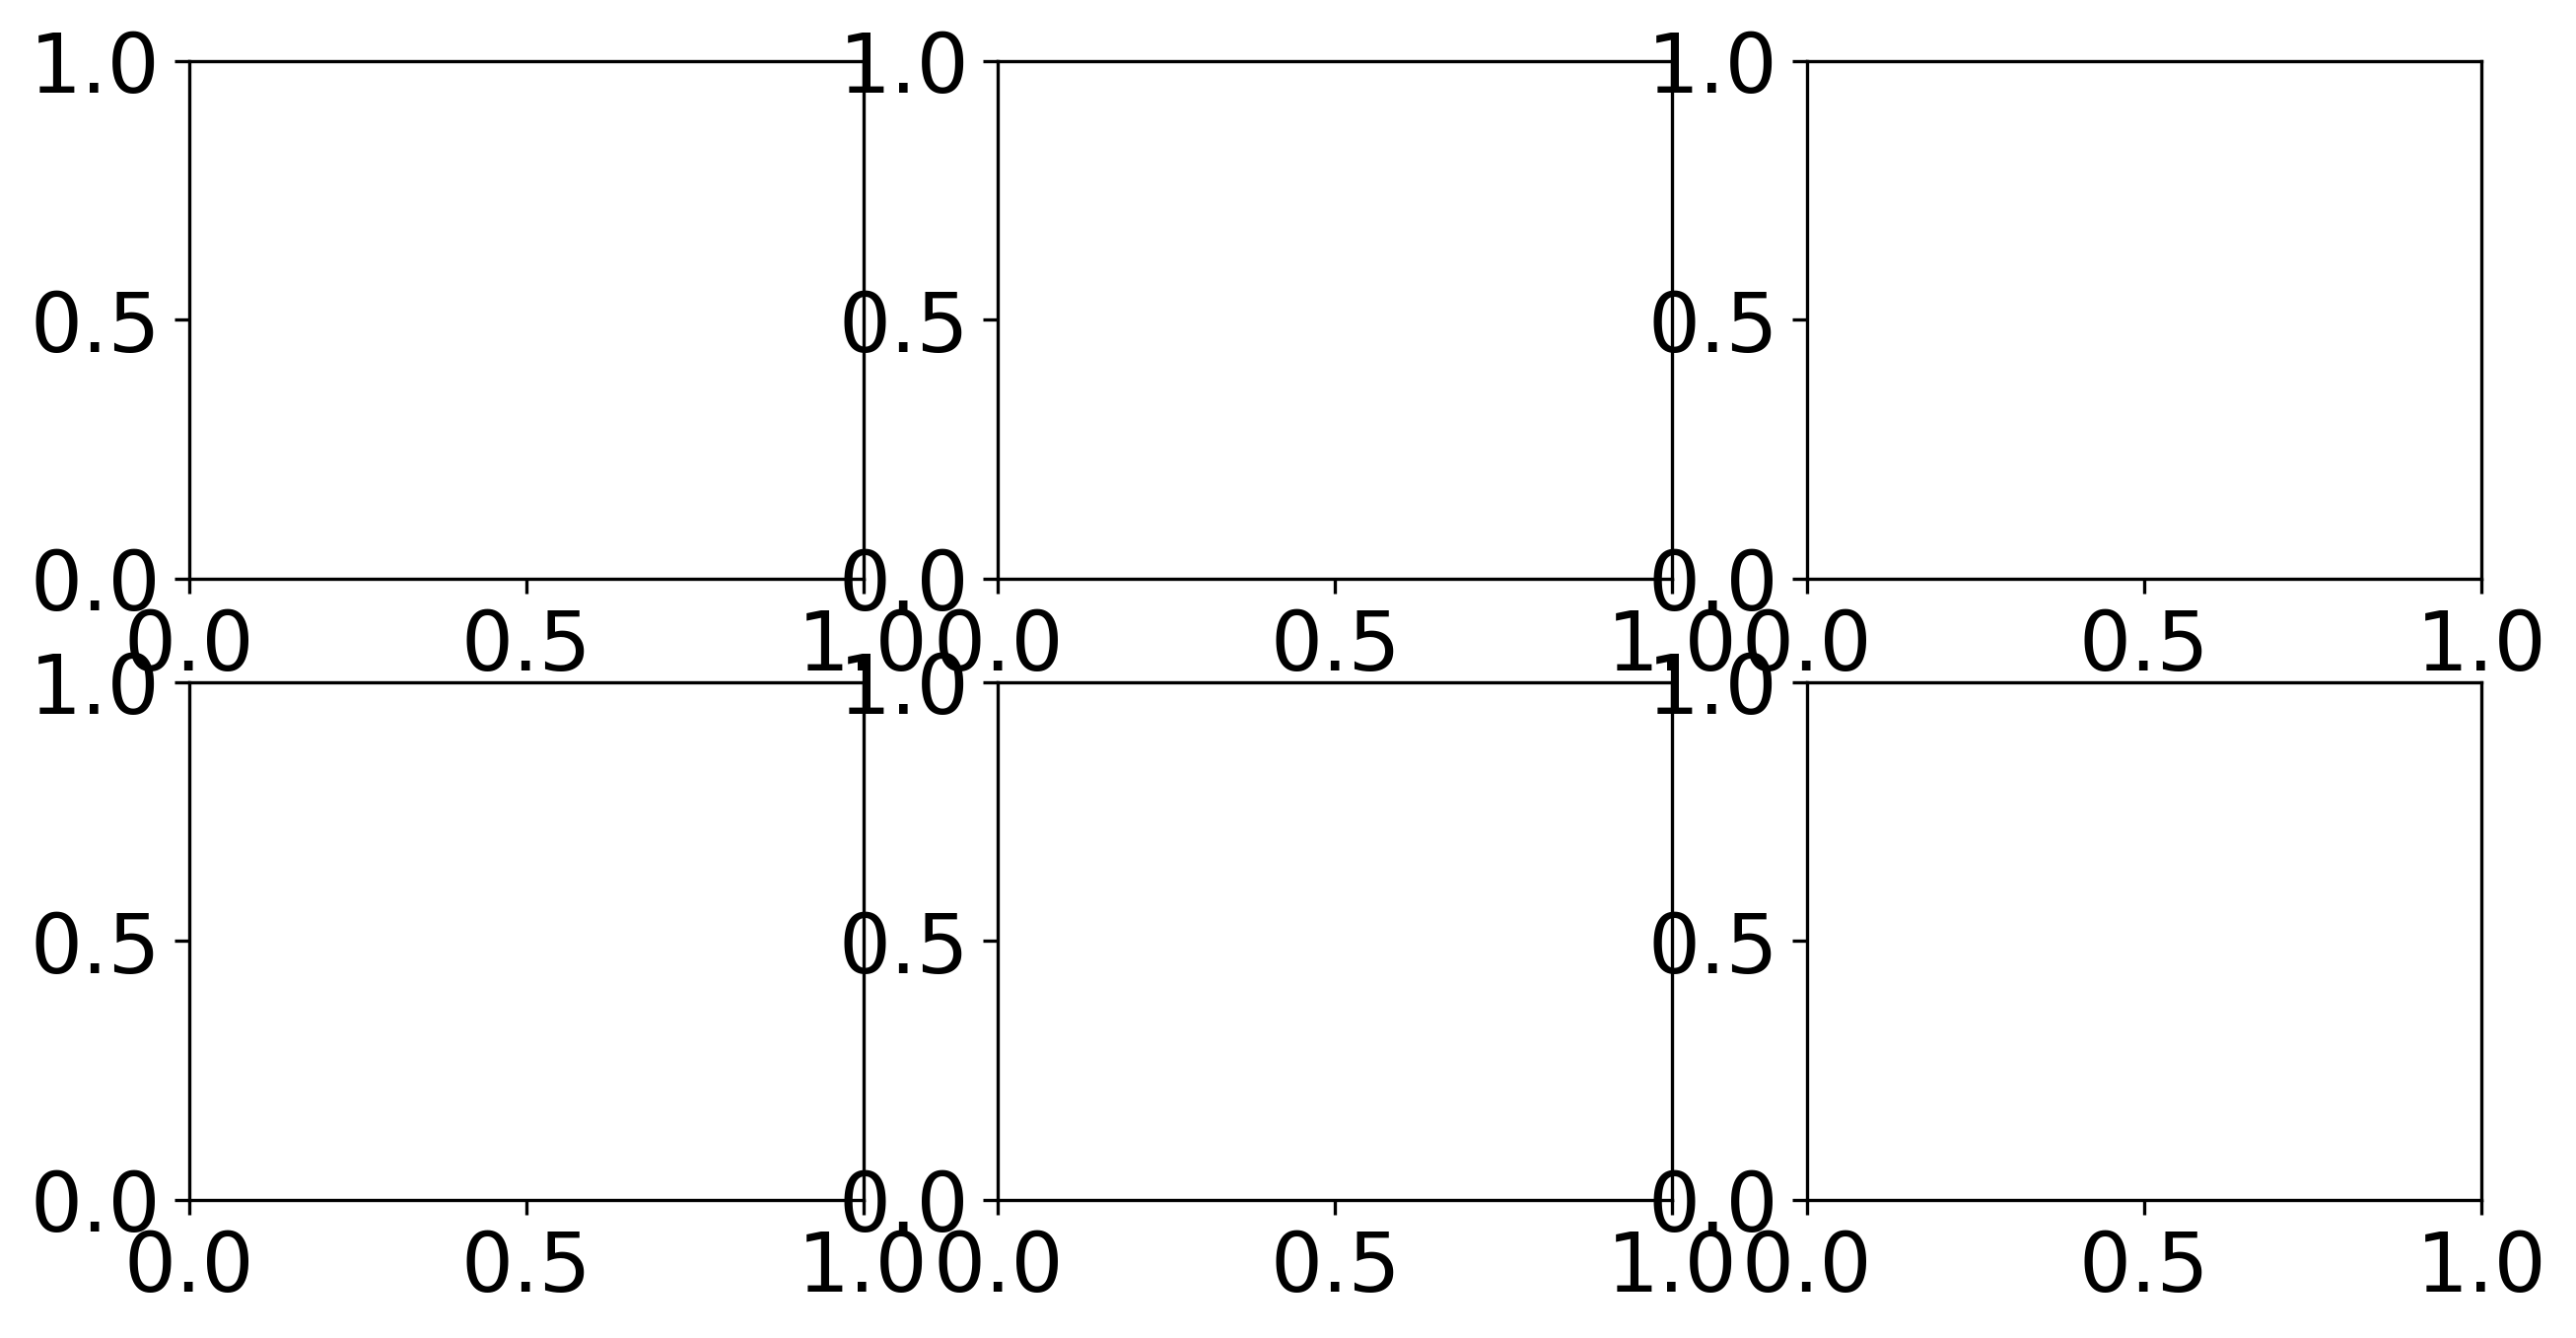

In [12]:
 # ires
sequence = "GAACUACGC"
structure = "(.....())"
fig, axes = plt.subplots(2, 3, figsize=(10, 5), dpi=300)
fig.set_fontsize(10)
axes = axes.flatten()
df_motif = get_motif_data(df_wt, df_uucg, "ires", sequence, structure)
for i, (name, g) in enumerate(df_motif.groupby("name")):
    axes[i].set_title(name)
    axes[i].scatter(g["wt_val"], g["uucg_val"])



### Supplemental Figure 19

In [ ]:
exclude = [
    "CAUGA_UCUAAA",
    "UACGG_CCUACA",
    "UAUGG_CUUAAC",
    "CACGG_CCUCAC",
    "CAUGC_GCUCAA",
    "CAUGC_GCUGAA",
    "CAUGG_CCUCAA",
    "CAUGG_CCUGAA",
    "UAAGG_CCUAAAG",
    "UAGGG_CCUAAC",
    "UAUGG_CCUCAC",
]

def r2(x, y):
    return round(stats.pearsonr(x, y)[0] ** 2, 3)

def plot_correlation_at_mg_conc(df, mg_conc):
    df_sub_mg = df[df["mg_conc"] == mg_conc]
    fig, ax = plt.subplots()
    df_sub_mg = df_sub_mg[~df_sub_mg["name"].isin(exclude)]
    df_sub_mg.merge(df_dg, on="name")
    df_sub_mg["ln_gaaa_avg"] = np.log(df_sub_mg["gaaa_avg"])
    sns.regplot(x="dg", y="ln_gaaa_avg", data=df_sub_mg, ax=ax, scatter_kws={"s": 75}, line_kws={"lw" : 3})
    ax.set_box_aspect(1)
    ax.set_xlabel("dG (kcal/mol)")
    ax.set_ylabel("ln GAAA reactivity")
    publication_style_ax(ax)
    return r2(df_sub_mg["dg"], df_sub_mg["ln_gaaa_avg"])
    

In [ ]:
print(sorted(df_mttr6_full["mg_conc"].unique()))

[0.0, 0.1, 0.25, 0.5, 0.75, 1.0, 1.5, 2.5, 3.5, 5.0, 6.5, 7.5, 10.0, 15.0, 20.0, 40.0]


0.615


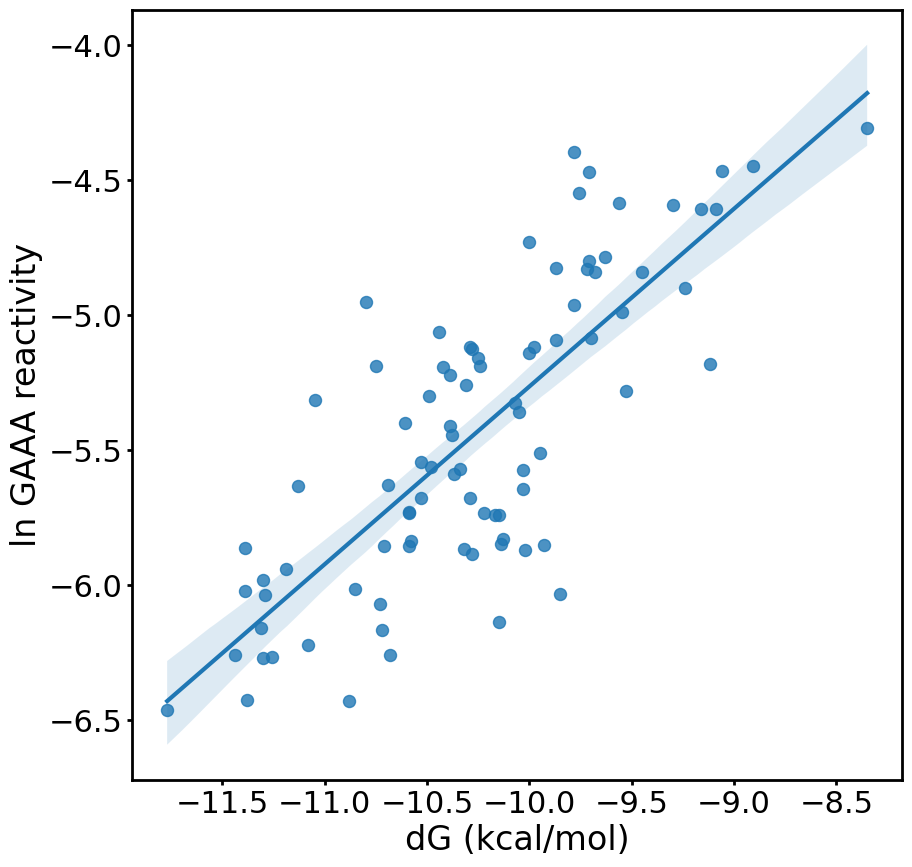

In [ ]:
r2_val = plot_correlation_at_mg_conc(df_mttr6_full, 40.0)
print(r2_val)



### Supplemental Figure 20


Text(0, 0.5, 'Mutation Fraction')

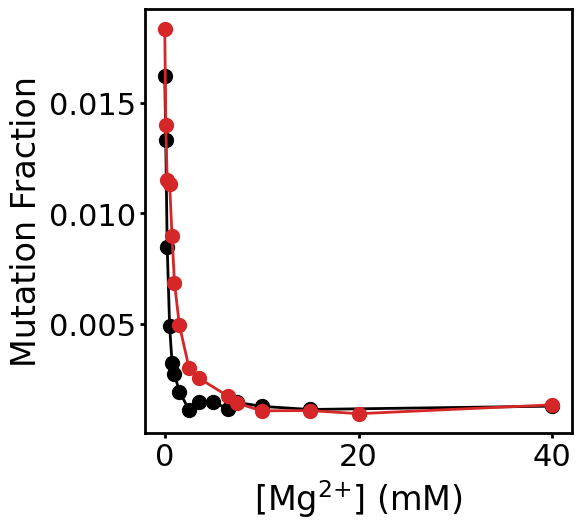

In [ ]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))
df_CAUGG_CCUAAC = df_mttr6_full[df_mttr6_full["name"] == "CAUGG_CCUAAC"]
df_CAUGG_CCUAAC = df_CAUGG_CCUAAC[df_CAUGG_CCUAAC["mg_conc"] != 5.0]
POS = 4
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='black', label='WT')
publication_line(ax, df_CAUGG_CCUAAC['mg_conc'], df_CAUGG_CCUAAC['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='tab:red', color='tab:red', label="CCUAAC_CAUGG")
ax.set_xlabel("[Mg$^{2\!+}\!$] (mM)")
ax.set_ylabel("Mutation Fraction")


Text(0, 0.5, 'Mutation Fraction')

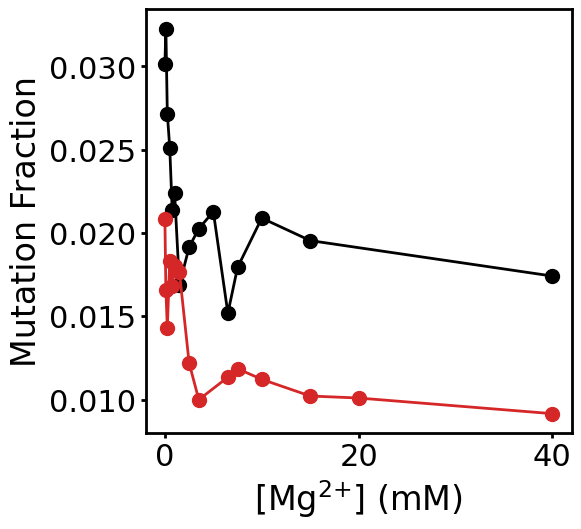

In [ ]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))
df_CAUGG_CCUAAC = df_mttr6_full[df_mttr6_full["name"] == "CAUGG_CCUAAC"]
df_CAUGG_CCUAAC = df_CAUGG_CCUAAC[df_CAUGG_CCUAAC["mg_conc"] != 5.0]
POS = 5
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='black')
publication_line(ax, df_CAUGG_CCUAAC['mg_conc'], df_CAUGG_CCUAAC['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='tab:red', color='tab:red')
ax.set_xlabel("[Mg$^{2\!+}\!$] (mM)")
ax.set_ylabel("Mutation Fraction")

Text(0.5, 0, '[Mg$^{2\\!+}\\!$] (mM)')

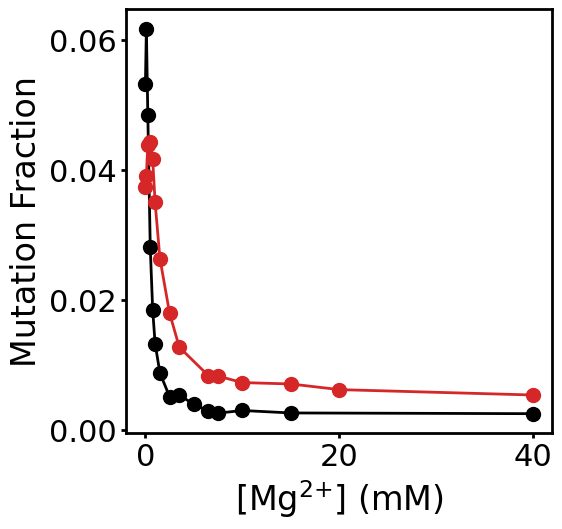

In [ ]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))
df_CAUGG_CCUAAC = df_mttr6_full[df_mttr6_full["name"] == "CAUGG_CCUAAC"]
df_CAUGG_CCUAAC = df_CAUGG_CCUAAC[df_CAUGG_CCUAAC["mg_conc"] != 5.0]
POS = 8
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='black')
publication_line(ax, df_CAUGG_CCUAAC['mg_conc'], df_CAUGG_CCUAAC['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='tab:red', color='tab:red')
ax.set_ylabel("Mutation Fraction")
ax.set_xlabel("[Mg$^{2\!+}\!$] (mM)")


### Supplemental Figure 21


In [ ]:
wt_w_o_mg = df_wt_mg[(df_wt_mg.mg_conc == 0) & (df_wt_mg.exp_name == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM")].iloc[0]
wt_w_mg = df_wt_mg[(df_wt_mg.mg_conc == 40) & (df_wt_mg.exp_name == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM")].iloc[0]


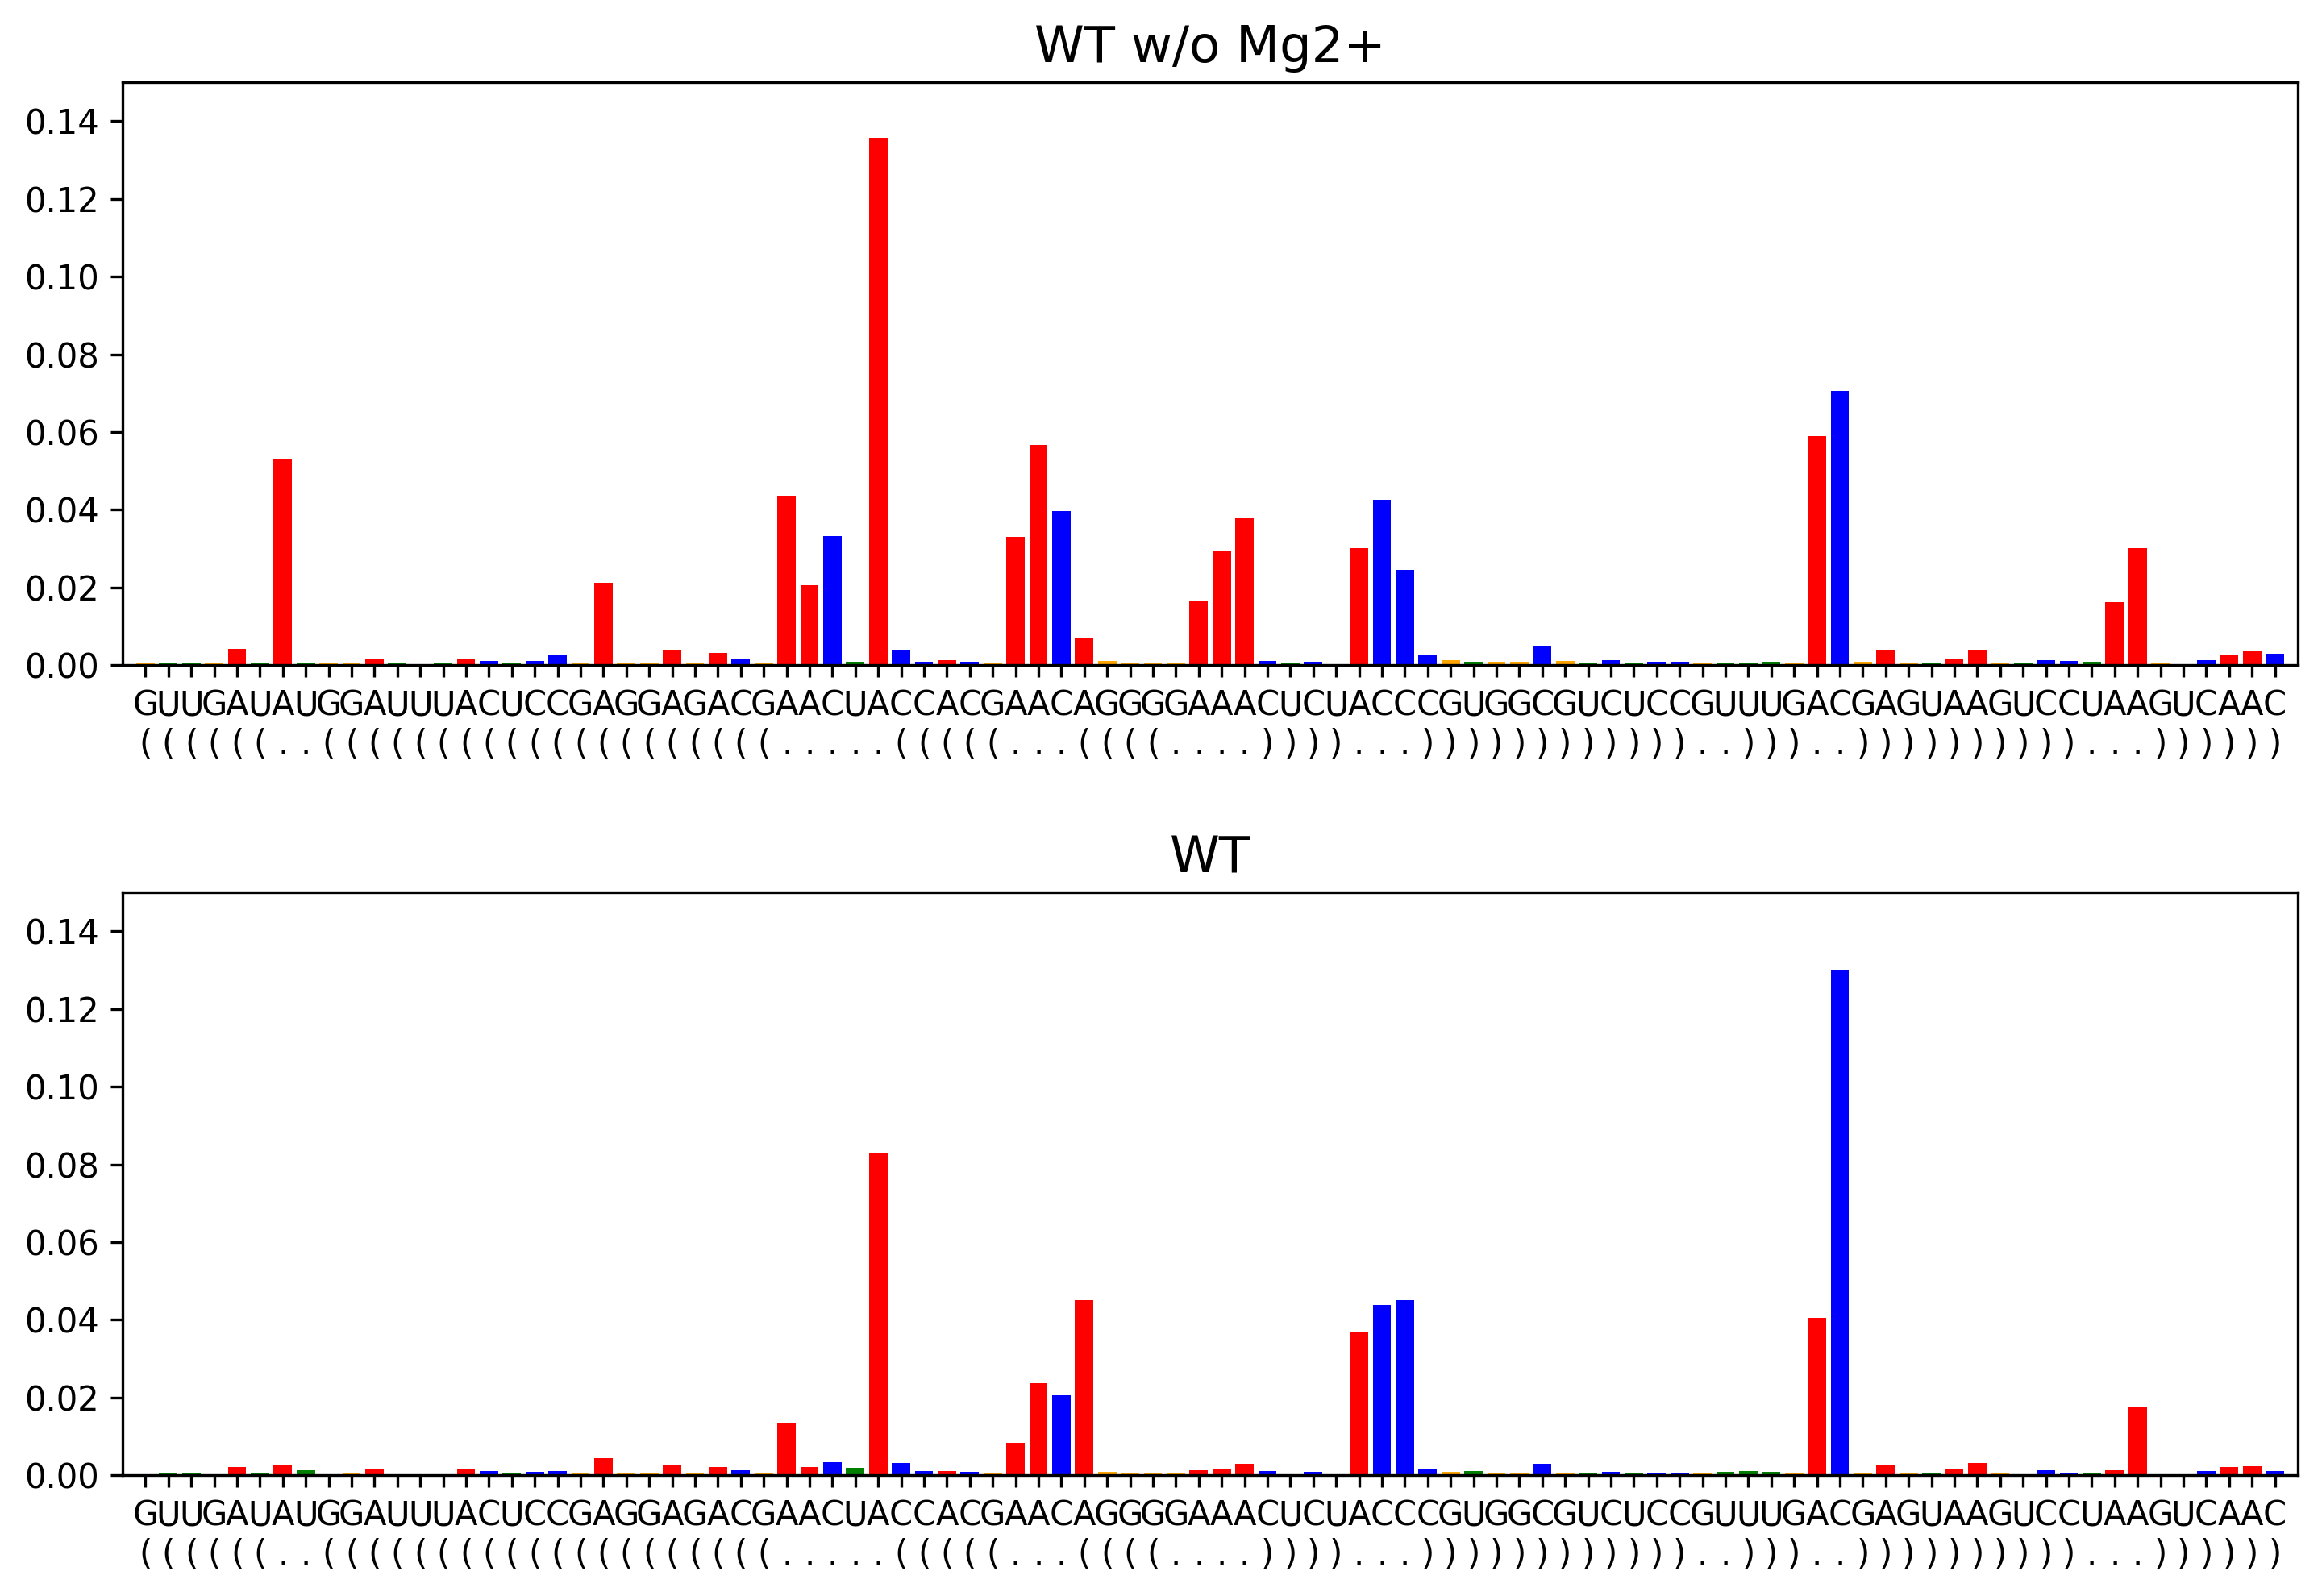

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7), dpi=300)
plot_pop_avg(wt_w_o_mg["sequence"], wt_w_o_mg["structure"], wt_w_o_mg["data"], ax=axes[0], 
             trim_5p=20, trim_3p=22)
axes[0].set_title("WT w/o Mg2+", fontsize=15)
axes[0].tick_params(axis='both', labelsize=10)  # Adjusts both x and y tick labels
axes[0].set_ylim([0, 0.15])
axes[0].set_xlim([-1, len(wt_w_o_mg["sequence"]) - 22 - 20])
plot_pop_avg(wt_w_mg["sequence"], wt_w_mg["structure"], wt_w_mg["data"], 
             ax=axes[1], trim_5p=20, trim_3p=22)
axes[1].set_title("WT", fontsize=15)
axes[1].tick_params(axis='both', labelsize=10)  # Adjusts both x and y tick labels
axes[1].set_ylim([0, 0.15])
axes[1].set_xlim([-1, len(uucg_w_o_mg["sequence"]) - 20])
fig.tight_layout()

### supplemental figure 23

(0.0, 0.02)

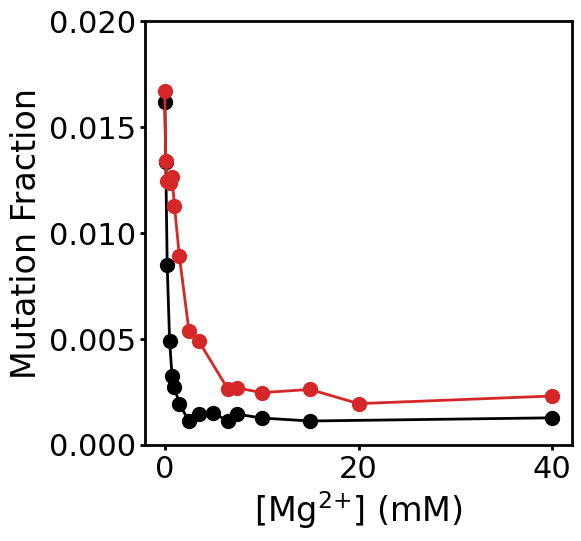

In [ ]:
# CCUAAAG_UAUGG
fig, ax = plt.subplots(figsize=(5.5, 5.5))
df_UAUGG_CCUAAAG = df_mttr6_full[df_mttr6_full["name"] == "UAUGG_CCUAAAG"]
df_UAUGG_CCUAAAG = df_UAUGG_CCUAAAG[df_UAUGG_CCUAAAG["mg_conc"] != 5.0]
POS = 4
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='black', label='WT')
publication_line(ax, df_UAUGG_CCUAAAG['mg_conc'], df_UAUGG_CCUAAAG['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='tab:red', color='tab:red')
ax.set_xlabel("[Mg$^{2\!+}\!$] (mM)")
ax.set_ylabel("Mutation Fraction")
ax.set_ylim([0, 0.02])

(0.0, 0.04)

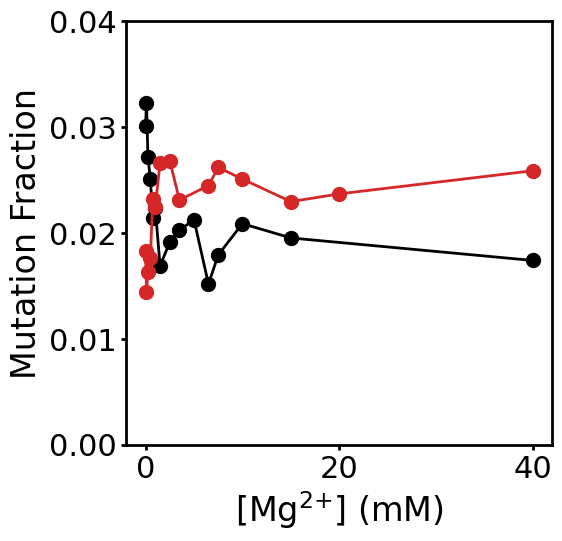

In [ ]:
# CCUAAAG_UAUGG
fig, ax = plt.subplots(figsize=(5.5, 5.5))
df_UAUGG_CCUAAAG = df_mttr6_full[df_mttr6_full["name"] == "UAUGG_CCUAAAG"]
df_UAUGG_CCUAAAG = df_UAUGG_CCUAAAG[df_UAUGG_CCUAAAG["mg_conc"] != 5.0]
POS = 5
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='black', label='WT')
publication_line(ax, df_UAUGG_CCUAAAG['mg_conc'], df_UAUGG_CCUAAAG['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='tab:red', color='tab:red')
ax.set_xlabel("[Mg$^{2\!+}\!$] (mM)")
ax.set_ylabel("Mutation Fraction")
ax.set_ylim([0, 0.04])

Text(0, 0.5, 'Mutation Fraction')

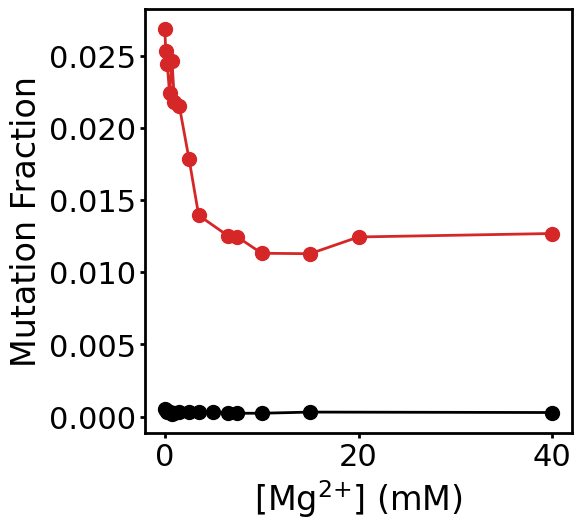

In [ ]:
# CCUAAAG_UAUGG
fig, ax = plt.subplots(figsize=(5.5, 5.5))
df_UAUGG_CCUAAAG = df_mttr6_full[df_mttr6_full["name"] == "UAUGG_CCUAAAG"]
df_UAUGG_CCUAAAG = df_UAUGG_CCUAAAG[df_UAUGG_CCUAAAG["mg_conc"] != 5.0]
POS = 6
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='black', label='WT')
publication_line(ax, df_UAUGG_CCUAAAG['mg_conc'], df_UAUGG_CCUAAAG['tlr'].apply(lambda x : x[POS-1]), marker='o', markerfacecolor='tab:red', color='tab:red')
ax.set_xlabel("[Mg$^{2\!+}\!$] (mM)")
ax.set_ylabel("Mutation Fraction")

(0.0, 0.065)

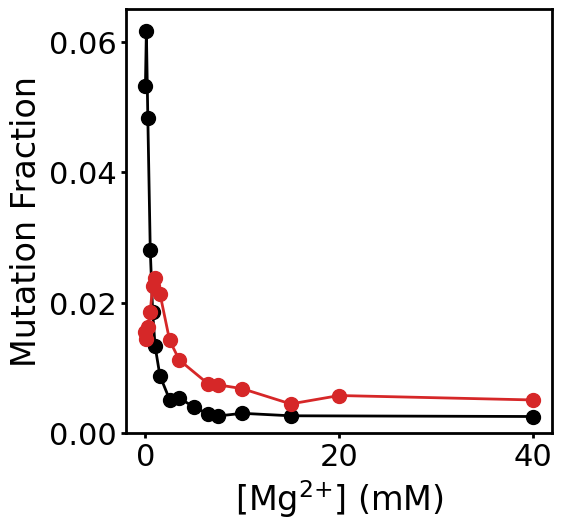

In [ ]:
# CCUAAAG_UAUGG
fig, ax = plt.subplots(figsize=(5.5, 5.5))
df_UAUGG_CCUAAAG = df_mttr6_full[df_mttr6_full["name"] == "UAUGG_CCUAAAG"]
df_UAUGG_CCUAAAG = df_UAUGG_CCUAAAG[df_UAUGG_CCUAAAG["mg_conc"] != 5.0]
POS = 8
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[POS-1]), marker='o', color='black', label='WT')
publication_line(ax, df_UAUGG_CCUAAAG['mg_conc'], df_UAUGG_CCUAAAG['tlr'].apply(lambda x : x[POS]), marker='o', markerfacecolor='tab:red', color='tab:red')
ax.set_xlabel("[Mg$^{2\!+}\!$] (mM)")
ax.set_ylabel("Mutation Fraction")
ax.set_ylim([0, 0.065])

(0.0, 0.065)

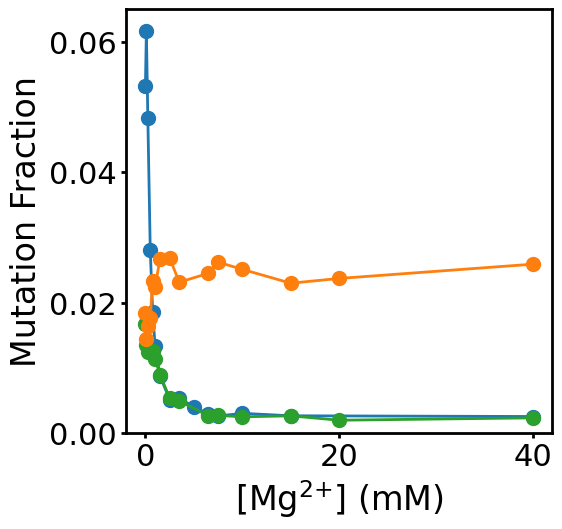

In [ ]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))
df_UAUGG_CCUAAAG = df_mttr6_full[df_mttr6_full["name"] == "UAUGG_CCUAAAG"]
df_UAUGG_CCUAAAG = df_UAUGG_CCUAAAG[df_UAUGG_CCUAAAG["mg_conc"] != 5.0]
POS = 8
publication_style_ax(ax)
publication_line(ax, df_wt['mg_conc'], df_wt['tlr'].apply(lambda x : x[8-1]), marker='o', color='tab:blue', label='WT')
publication_line(ax, df_UAUGG_CCUAAAG['mg_conc'], df_UAUGG_CCUAAAG['tlr'].apply(lambda x : x[3]), marker='o', color='tab:green', label='WT')
publication_line(ax, df_UAUGG_CCUAAAG['mg_conc'], df_UAUGG_CCUAAAG['tlr'].apply(lambda x : x[4]), marker='o', color='tab:orange', label='WT')
#publication_line(ax, df_UAUGG_CCUAAAG['mg_conc'], df_UAUGG_CCUAAAG['tlr'].apply(lambda x : x[5]), marker='o', color='tab:purple', label='WT')
ax.set_xlabel("[Mg$^{2\!+}\!$] (mM)")
ax.set_ylabel("Mutation Fraction")
ax.set_ylim([0, 0.065])

### supplemental figure XXX: compare reactivity for destabilization 

In [ ]:
df_mttr6_muts["name"].unique()

array(['minittr_6_no_tlr_fixed', 'minittr_6_uucg_fixed',
       'minittr_6_no_3_3_junc_fixed', 'minittr_6_h1_3bp_longer_fixed',
       'minittr_6_no_ires_fixed', 'minittr_6_h2_3bp_longer_fixed',
       'minittr_6_h3_3bp_longer_fixed'], dtype=object)

In [ ]:
df_wt_mg[(df_wt_mg["mg_conc"] == 40.0) & (df_wt_mg["buffer_conc"] == 50)].iloc[0]["gaaa_avg"]

0.0019166667

In [ ]:
df_mttr6_muts[(df_mttr6_muts["name"] == "minittr_6_h1_3bp_longer_fixed") & (df_mttr6_muts["mg_conc"] == 40.0) & (df_mttr6_muts["buffer_conc"] == 50)].iloc[0]["gaaa_avg"]

0.0058866667

In [ ]:
df_mttr6_muts[(df_mttr6_muts["name"] == "minittr_6_h2_3bp_longer_fixed") & (df_mttr6_muts["mg_conc"] == 40.0) & (df_mttr6_muts["buffer_conc"] == 50)].iloc[0]["gaaa_avg"]

0.0073933333

In [ ]:
df_mttr6_muts[(df_mttr6_muts["name"] == "minittr_6_h3_3bp_longer_fixed") & (df_mttr6_muts["mg_conc"] == 40.0) & (df_mttr6_muts["buffer_conc"] == 50)].iloc[0]["gaaa_avg"]

0.0033966667000000002

Text(0, 0.5, 'GAAA Mutation Fraction')

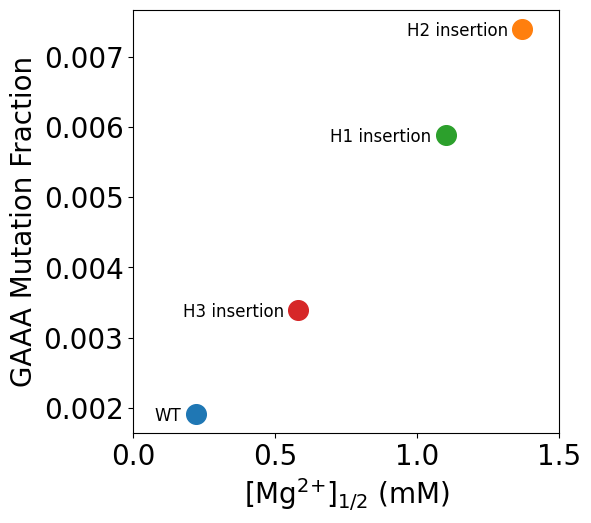

In [ ]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))
# Your scatter plot data
x_values = [0.22, 1.10, 1.37, 0.58]
y_values = [0.0019166667, 0.0058866667, 0.0073933333, 0.0033966]
colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
labels = ['WT', 'H1 insertion', 'H2 insertion', 'H3 insertion']  # Replace with your labels

# Create scatter plot
for x, y, c, label in zip(x_values, y_values, colors, labels):
    ax.scatter([x], [y], color=c, s=200)
    ax.text(x-0.05, y-0.00010, label, fontsize=12, ha='right')  # Adjust text properties as needed
ax.set_xlim([0, 1.5])
ax.set_xlabel("[Mg$^{2\!+}\!$]$_{1/2}$ (mM)")
ax.set_ylabel("GAAA Mutation Fraction")